In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading Kaggle MNIST data from drive

train=pd.read_csv(r"C:\Users\Vijendrasc\Downloads\Data\mnist_train.csv")
test=pd.read_csv(r"C:\Users\Vijendrasc\Downloads\Data\mnist_test.csv")
testprt=pd.read_csv(r"C:\Users\Vijendrasc\Downloads\Data\mnist_testprt.csv")

train.head()
test.head()
testprt.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_shuffled=shuffle(train.values, random_state=0)

#Extracting features as x and labels as y 
x_train=train.drop(labels=["label"],axis = 1)
y_train=train["label"]

#Loading test data (no labels are provided) 
x_test=test.values
print(f'X_train={x_train.shape}, y={y_train.shape}, x_test={x_test.shape}')


X_train=(60000, 784), y=(60000,), x_test=(10000, 784)


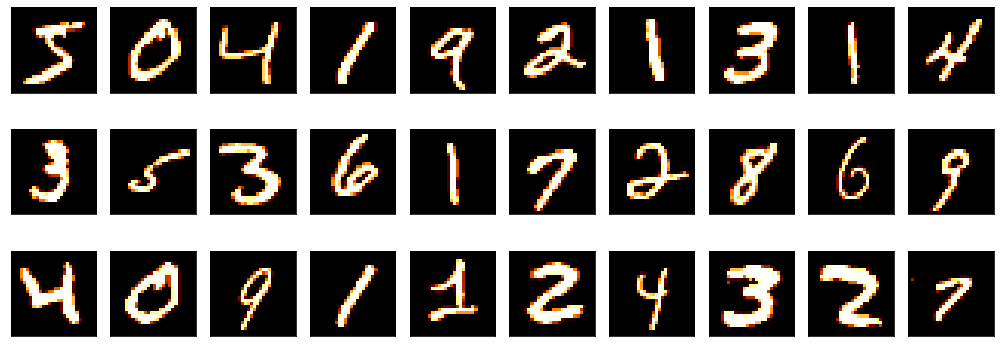

In [4]:
#Plotting some digits

plt.figure(figsize=(14,12))

for digit_num in range(0,30): 
    plt.subplot(7,10,digit_num+1) 
    grid_data=x_train.iloc[digit_num].values.reshape(28,28) 
    plt.imshow(grid_data, interpolation="none",cmap="afmhot") 
    plt.xticks([]) 
    plt.yticks([])
plt.tight_layout()

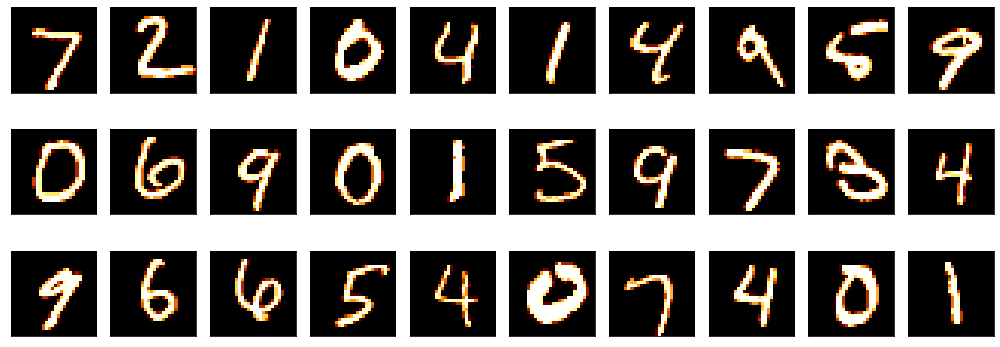

In [5]:
#Shuffeling training data
testprt_shuffled=shuffle(train.values, random_state=0)

#Extracting features as X and labels as y
x_testprt=testprt.drop(labels=["label"],axis = 1)
y_testprt=testprt["label"]
plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot (7,10, digit_num+1)
    grid_data=x_testprt.iloc[digit_num].values.reshape(28,28) 
    plt.imshow(grid_data, interpolation="none", cmap="afmhot")
    plt.xticks([])
    plt.yticks([]) 
plt.tight_layout()

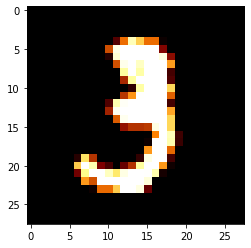

In [6]:
grid_data=x_train.iloc[10].values.reshape(28,28) 
plt.imshow(grid_data, interpolation="none", cmap="afmhot")

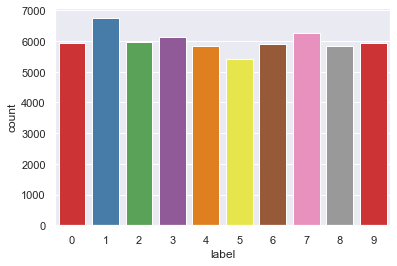

In [7]:
#Exploring the class distribution (almost equally distributed)

sns.set(style="darkgrid") 
counts=sns.countplot(x="label", data=train, palette="Set1")

In [8]:
scaler=MinMaxScaler(feature_range=(-1, 1)) 
scaler.fit(x_train) 
normalized_x_train=scaler.transform(x_train)
normalized_x_test=scaler.transform(x_test)

In [9]:
#Finidng the best gamma and c value
#from sklearn.svm import SVC
#from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.model_selection import GridSearchCV

#C_range=np.logspace(-2,2,10)
#gamma_range=np.logspace(-2,2,10)
#param_grid=dict(gamma=gamma_range,C=C_range)

#param_grid={'C': [0.001,0.01,0.1,1,10,100], 'gamma': [0.0001,0.001,0.01,0.1], 'kernel': ['linear','rbf']}
#cv=StratifiedShuffleSplit(test_size=0.2,random_state=42)
#grid=GridSearchCV(SVC(),param_grid=param_grid,cv=cv)
#grid.fit(normalized_x_train,y_train)

#print("The best parameters are %s with a score of %0.2f"%(grid.best_params_, grid.best_score_))

In [10]:
#Dimensionality Reduction with PCA (incipal moment Analysis).

pca= PCA(n_components=0.90)
pca_x_train=pca.fit_transform(normalized_x_train) 
pca_x_test=pca.transform(normalized_x_test)
print (f'{pca.explained_variance_} \n Number of PCA Vectors={len(pca.explained_variance_)}')

[20.46749228 14.96556378 13.01083442 11.36648413 10.2684713   9.09465393
  6.90062023  6.08224197  5.82522144  4.97100058  4.4483582   4.26656256
  3.61872383  3.56872543  3.32941238  3.12760221  2.7935477   2.69302437
  2.50398124  2.43105249  2.24858392  2.12319586  2.01112188  1.92458865
  1.86313316  1.77015514  1.71375883  1.6584752   1.57066972  1.45704763
  1.38794441  1.36696795  1.2709374   1.23712388  1.20219636  1.14653124
  1.06672222  1.02891224  1.01535266  0.99602734  0.96329648  0.93817581
  0.88263497  0.83985104  0.81192584  0.79110695  0.76349025  0.74151934
  0.71719569  0.67884571  0.67281904  0.65971735  0.62423857  0.60941628
  0.59924182  0.57246865  0.56843079  0.54512837  0.53521209  0.5162525
  0.50723676  0.50461442  0.48594029  0.46721959  0.45074549  0.43704587
  0.42822471  0.41502197  0.40673362  0.39783303  0.39434185  0.38191103
  0.37448541  0.36886675  0.34959065  0.34565866  0.34053031  0.32714647
  0.31132144  0.30196386  0.29968241  0.29769785  0.

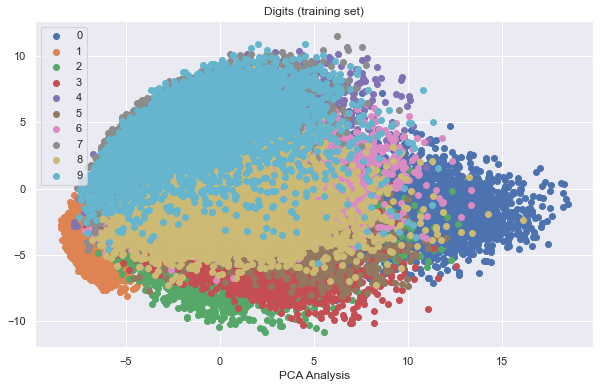

In [11]:
#Plotting PCA output

f, ax = plt.subplots(1, 1) 
for i in range(10):
    ax.scatter(pca_x_train[y_train== i,0], pca_x_train[y_train== i,1],label=i) 

ax.set_xlabel("PCA Analysis")
ax.legend()
f.set_size_inches(10,6)
ax.set_title("Digits (training set)")
plt.show()

In [12]:
classifier=svm.SVC(gamma=0.00728932024638, C=2.82842712475) 
classifier.fit(pca_x_train, y_train)

train_accuracy=classifier.score(pca_x_train, y_train) 
print (f"Training Accuracy: {train_accuracy*100:.3f}%")


predictions=classifier.predict(pca_x_test) 
print (f"Prediction Accuracy: {predictions}")


predicted=classifier.predict(pca_x_test)
newpred=trainingacc_score(y_testprt,predicted)
print(f"Testing Accuracy: {newpred*100:.3f}%")

Training Accuracy: 99.927%
Prediction Accuracy: [7 2 1 ... 4 5 6]


NameError: name 'trainingacc_score' is not defined

In [ ]:
ImageId=[i+1 for i in range(len(predictions))] 
submission=pd.DataFrame({'ImageId':ImageId,'Label':(predictions)})

filename='Digit Recognizer - SVM.csv'

submission.to_csv(filename, index=False)
print('Saved file: '+filename)
submission.head()